
# 🏠 Caso de Machine Learning con Regresión Lineal: **Boston Housing**

Este notebook colab muestra un flujo **end-to-end** de *machine learning supervisado* usando **Regresión Lineal** para predecir el precio medio de viviendas (MEDV) en el clásico dataset **Boston Housing**.

## Qué hace este colab
1. Cargar el dataset.  
2. Separar en **train/test**.  
3. Entrenar `LinearRegression`.  
4. Evaluar con **MAE**, **RMSE** y **R²**.  
5. Validación cruzada **K-Fold**.  
6. Gráficos: *y real vs. y predicho*, residuos y coeficientes (importancia).

> **Nota ética/dataset:** el dataset Boston ha sido criticado por sesgos históricos. Se usa aquí solo con fines didácticos.


In [2]:
# Paso 1: Importar librerias a utilizar en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Cargar dataset Boston desde GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


| Columna     | Significado                                                                                   |
| ----------- | --------------------------------------------------------------------------------------------- |
| **crim**    | Tasa de criminalidad per cápita por ciudad.                                                   |
| **zn**      | Proporción de terrenos residenciales con lotes mayores a 25,000 pies cuadrados.               |
| **indus**   | Proporción de acres de negocios no minoristas por ciudad.                                     |
| **chas**    | Variable ficticia (dummy) que indica si el tracto limita con el río Charles (1 = sí, 0 = no). |
| **nox**     | Concentración de óxidos de nitrógeno (partes por 10 millones).                                |
| **rm**      | Número promedio de habitaciones por vivienda.                                                 |
| **age**     | Proporción de unidades ocupadas por sus dueños construidas antes de 1940.                     |
| **dis**     | Distancia ponderada a cinco centros de empleo de Boston.                                      |
| **rad**     | Índice de accesibilidad a autopistas radiales.                                                |
| **tax**     | Tasa de impuesto a la propiedad por cada \$10,000.                                            |
| **ptratio** | Relación alumno-maestro por ciudad.                                                           |
| **b**       | 1000(Bk - 0.63)², donde Bk es la proporción de residentes de raza negra por ciudad.           |
| **lstat**   | Porcentaje de población de bajo estatus socioeconómico.                                       |
| **medv**    | Valor medio de las viviendas ocupadas por sus dueños (en miles de dólares).                   |


In [12]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [13]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["medv"])
y = df["medv"]

target_name = "medv"
dataset_used = "Boston (CSV desde GitHub)"

print(f"Dataset utilizado: {dataset_used}")
df.head()

Dataset utilizado: Boston (CSV desde GitHub)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((404, 13), (102, 13))

In [17]:
# 3) Entrenar modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [18]:
# 4) Evaluación
y_pred = linreg.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # aquí el cambio
r2   = r2_score(y_test, y_pred)

In [19]:
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R^2  : {r2:.4f}")

MAE  : 3.1891
RMSE : 4.9286
R^2  : 0.6688


| Métrica                                    | ¿Qué mide?                                                                                                             |
| ------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------- |
| **MAE** (Error Absoluto Medio)             | Promedio de la magnitud de los errores, sin importar el signo. Fácil de interpretar.                                   |
| **MSE** (Error Cuadrático Medio)           | Promedio de los errores al cuadrado; penaliza más los errores grandes.                                                 |
| **RMSE** (Raíz del Error Cuadrático Medio) | Raíz cuadrada del MSE, expresado en las mismas unidades que la variable objetivo.                                      |
| **R²** (Coeficiente de determinación)      | Proporción de la variabilidad de la variable objetivo que explica el modelo. Valores cercanos a 1 indican buen ajuste. |


**Observaciones**

* MAE (Error Absoluto Medio): 3.1891: Este valor indica que, en promedio, la diferencia entre las predicciones de tu modelo y los valores reales es de aproximadamente 3.19 unidades. Es una medida del error absoluto promedio, y un valor más bajo es mejor.

* RMSE (Raíz del Error Cuadrático Medio): 4.9286: Similar al MAE, esta métrica también mide el error promedio de las predicciones, pero le da más peso a los errores grandes. La diferencia principal es que el RMSE penaliza más los errores grandes. En tu caso, el RMSE de 4.93 unidades indica la desviación estándar de los residuos (la distancia entre los puntos de datos y la línea de regresión).

* (R-cuadrado): 0.6688: El R2 es una métrica clave. Un valor de 0.6688, o 66.88%, significa que aproximadamente el 67% de la variabilidad de la variable objetivo (Y_test) puede ser explicada por las variables independientes (X_test) en tu modelo. Un valor más cercano a 1 indica que el modelo explica una mayor proporción de la variabilidad, por lo que un 67% es un resultado bastante bueno, aunque no perfecto.

**Resumen**
El modelo de regresión lineal tiene un rendimiento aceptable. La métrica R2
  sugiere que las variables que estás utilizando son moderadamente efectivas para predecir la variable objetivo. Sin embargo, hay un 33% de variabilidad que no está siendo explicada, lo que podría deberse a variables omitidas, relaciones no lineales o simplemente ruido en los datos. Para mejorar el modelo, podrías considerar agregar más características, explorar transformaciones de datos o probar otros algoritmos más complejos.

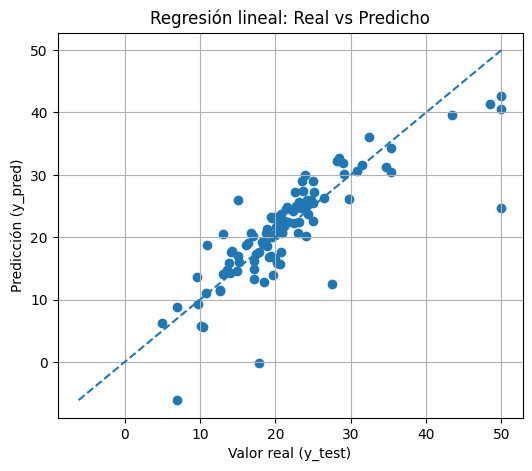

In [25]:
# a) Gráfico: Real vs. Predicho
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Valor real (y_test)")
plt.ylabel("Predicción (y_pred)")
plt.title("Regresión lineal: Real vs Predicho")
# Línea identidad
min_v = min(y_test.min(), y_pred.min())
max_v = max(y_test.max(), y_pred.max())
plt.plot([min_v, max_v], [min_v, max_v], linestyle='--')
plt.grid(True)
plt.show()


* Existe una correlación positiva: Como se puede ver en el gráfico de dispersión, los puntos tienden a seguir una tendencia ascendente. Esto significa que a medida que los valores reales aumentan, los valores predichos también aumentan. Esta es una señal positiva y esperada en un modelo de regresión lineal.

* El modelo tiene un buen ajuste en general: Los puntos se agrupan de manera bastante cercana alrededor de la línea de identidad (la línea discontinua). Esta línea representa el escenario ideal donde los valores predichos son exactamente iguales a los valores reales. El hecho de que la mayoría de los puntos estén cerca de esta línea indica que tu modelo está haciendo buenas predicciones en general.

* Identificación de errores y valores atípicos: Aunque el ajuste es bueno, hay algunos puntos que se desvían de la línea, especialmente en el rango superior de valores reales (alrededor de 40 a 50). Estos puntos son los errores de tu modelo.
 - Un punto con un valor real de 40 y una predicción de aproximadamente 25 es un ejemplo de un error significativo.
 - Otro punto con un valor real de 50 y una predicción de 42, aunque menos desviado, sigue siendo un error.

* Sesgo del modelo: El gráfico sugiere que el modelo podría tener un ligero sesgo en ciertos rangos. Por ejemplo, en los valores reales bajos (entre 0 y 10), las predicciones parecen estar ligeramente por encima de la línea. En los valores altos (superiores a 40), las predicciones tienden a estar por debajo de la línea. Esto podría indicar que el modelo no está capturando completamente la relación subyacente en esos extremos.

# **Gráfico: Residuos**
Los residuos son la diferencia entre el valor real de un dato y el valor que tu modelo de regresión predice para ese mismo dato. En términos simples, son los errores de tu modelo.

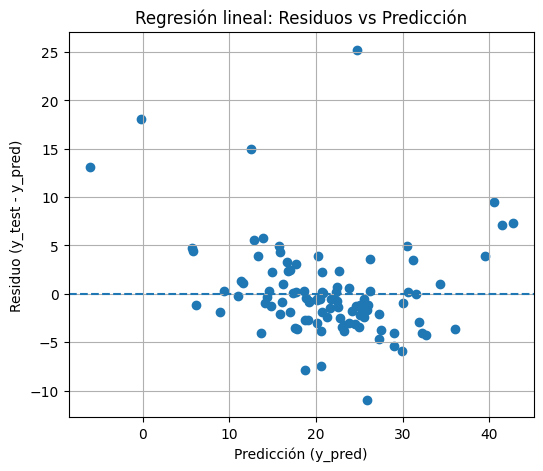

In [26]:
#b) Gráfico: Residuos
resid = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, resid)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicción (y_pred)")
plt.ylabel("Residuo (y_test - y_pred)")
plt.title("Regresión lineal: Residuos vs Predicción")
plt.grid(True)
plt.show()


**Conclusiones del gráfico de residuos**
* Ausencia de un patrón claro: Un buen modelo de regresión lineal debe tener residuos distribuidos de manera aleatoria alrededor de la línea horizontal en cero. En tu gráfico, los puntos se ven dispersos y no forman un patrón discernible, como una forma de "U" o un embudo. Esto es una señal positiva, ya que sugiere que el modelo no tiene un sesgo sistemático y que la relación lineal es una suposición adecuada para los datos.

* Varianza no constante (Heterocedasticidad): Al observar la dispersión de los puntos, se puede notar que la varianza de los residuos no parece ser constante. La dispersión de los puntos es mayor en los valores predichos bajos (cerca de 0 a 10) y altos (alrededor de 40), y es más estrecha en los valores intermedios (alrededor de 20 a 30). Esta varianza no constante se conoce como heterocedasticidad.

* Presencia de valores atípicos: Hay algunos puntos que se desvían significativamente de la línea en cero. Por ejemplo, el punto con un residuo de alrededor de 25 en una predicción de 20 es un valor atípico notable. Estos puntos representan instancias en las que tu modelo hizo una predicción con un error muy grande.

# **Coeficientes**

Los coeficientes en un modelo de regresión lineal son los números que multiplican a cada una de las variables (características o features) de tu modelo.

En la ecuación de una regresión lineal simple, y=mx+b, el coeficiente es m, que es la pendiente de la línea. En una regresión lineal con múltiples variables, cada variable tiene su propio coeficiente. Por ejemplo, en y=c
1
​
 x
1
​
 +c
2
​
 x
2
​
 +⋯+c
n
​
 x
n
​
 +b, los coeficientes son c
1
​
 ,c
2
​
 ,…,c
n
​
 .


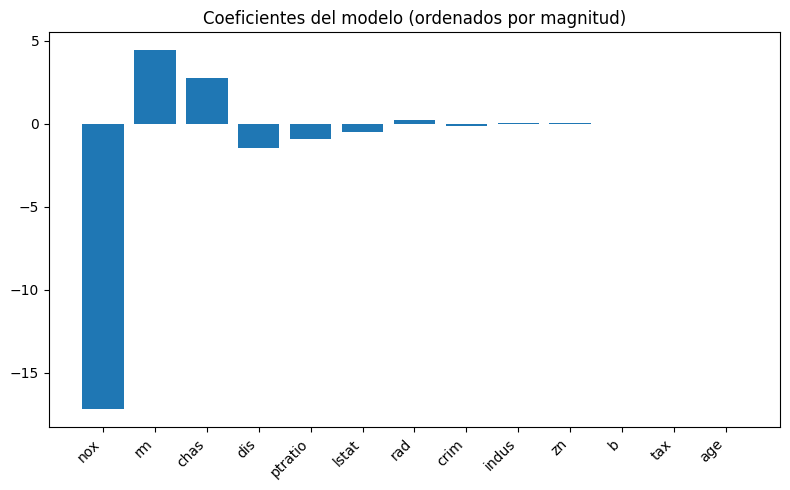

In [28]:
# c) Importancia (coeficientes)
feat_names = list(df.drop(columns=[target_name]).columns)
coefs = linreg.coef_

# Ordenar por magnitud
order = np.argsort(np.abs(coefs))[::-1]
feat_sorted = [feat_names[i] for i in order]
coefs_sorted = coefs[order]

plt.figure(figsize=(8,5))
plt.bar(range(len(coefs_sorted)), coefs_sorted)
plt.xticks(range(len(coefs_sorted)), feat_sorted, rotation=45, ha='right')
plt.title("Coeficientes del modelo (ordenados por magnitud)")
plt.tight_layout()
plt.show()


**Conclusiones del gráfico de coeficientes**
* Identificación de las variables más importantes: El gráfico de barras muestra la magnitud de los coeficientes de cada variable. Cuanto más alta o más baja sea la barra, más importante es esa variable para el modelo.

  - Las variables nox y rm son las más importantes, ya que sus coeficientes tienen la mayor magnitud (uno negativo y el otro positivo). Esto significa que un cambio en estas variables tiene el mayor impacto en la predicción del modelo.

* Dirección de la relación (impacto positivo vs. negativo): El signo del coeficiente te dice si la relación con la variable objetivo es positiva o negativa.

 - Impacto negativo: Las variables nox y ptratio tienen coeficientes negativos. Esto sugiere que a medida que los valores de estas variables aumentan, el valor predicho de la variable objetivo tiende a disminuir.

 - Impacto positivo: Las variables rm y chas tienen coeficientes positivos. Esto indica que a medida que los valores de estas variables aumentan, el valor predicho de la variable objetivo también tiende a aumentar.

* Variables menos relevantes: Las variables cuyos coeficientes están muy cerca de cero, como age, tax, b, zn, crim, e indus, tienen un impacto mínimo en las predicciones del modelo. Es posible que estas variables no sean lo suficientemente relevantes para explicar la variabilidad de la variable objetivo o que su influencia esté correlacionada con otras variables más importantes.